# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Regression Model Evaluation

In [7]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MedHouseVal'])

data = pd.concat([X, y], axis=1)

In [8]:
data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [9]:
X = data.drop('MedHouseVal', axis=1)

y = data.MedHouseVal

In [10]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
linreg = LinReg()

In [20]:
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
#test 
y_pred_test = linreg.predict(X_test)
y_pred_test[:10]

array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725,
       2.01175367, 2.64550005, 2.16875532, 2.74074644, 3.91561473])

In [32]:
#training 
y_pred_train = linreg.predict(X_train)
y_pred_train[:10]

array([1.93725845, 2.48910616, 2.64735483, 1.56589492, 1.61312839,
       3.2835959 , 1.54483704, 4.13952963, 0.84330441, 2.65994108])

## 3. Calculate and print R-squared for both the training and the testing set.

In [23]:
train_score=linreg.score(X_train, y_train)
test_score=linreg.score(X_test, y_test)

print ('Train: ',train_score)
print('Test: ', test_score)

Train:  0.6125511913966952
Test:  0.5757877060324508


## 4. Calculate and print mean squared error for both the training and the testing set.

In [33]:
train_mse = mse(y_train, y_pred_train, squared=False)
test_mse = mse(y_test, y_pred_test, squared=False)

print ('Train: ',train_mse)
print('Test: ', test_mse)

Train:  0.7196757085831575
Test:  0.7455813830127764


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [35]:
train_mae = mae(y_train, y_pred_train)
test_mae = mae(y_test, y_pred_test)

print ('Train: ',train_mae)
print('Test: ', test_mae)

Train:  0.5286283596581922
Test:  0.5332001304956554


## Classification Model Evaluation

In [36]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [37]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [104]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [105]:
logreg = LogisticRegression(max_iter=100)

In [106]:
logreg.fit(X_train, y_train)

/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/criscarneiro/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
#test 
y_pred_test = logreg.predict(X_test)
y_pred_test[:4]

array([1, 0, 2, 1])

In [108]:
#training 
y_pred_train = logreg.predict(X_train)
y_pred_train[:4]

array([0, 0, 1, 0])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [109]:
#train
acc(y_train, y_pred_train)

0.975

In [110]:
#train
acc(y_test, y_pred_test)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [111]:
#was told in class to ignore

## 10. Calculate and print the precision score for both the training and the testing set.

In [112]:
#test
prec(y_test, y_pred_test, average='micro')

1.0

In [113]:
#train
prec(y_train, y_pred_train, average='micro')

0.975

## 11. Calculate and print the recall score for both the training and the testing set.

In [114]:
#test
rec(y_test, y_pred_test, average='micro')

1.0

In [115]:
#train
rec(y_train, y_pred_train, average='micro')

0.975

## 12. Calculate and print the F1 score for both the training and the testing set.

In [116]:
#test
f1(y_test, y_pred_test, average='micro')

1.0

In [117]:
#train
f1(y_train, y_pred_train, average='micro')

0.975

## 13. Generate confusion matrices for both the training and the testing set.

In [118]:
#test
cm(y_test, y_pred_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [119]:
cm(y_test, y_pred_test)/cm(y_test, y_pred_test).sum()*100

array([[33.33333333,  0.        ,  0.        ],
       [ 0.        , 30.        ,  0.        ],
       [ 0.        ,  0.        , 36.66666667]])

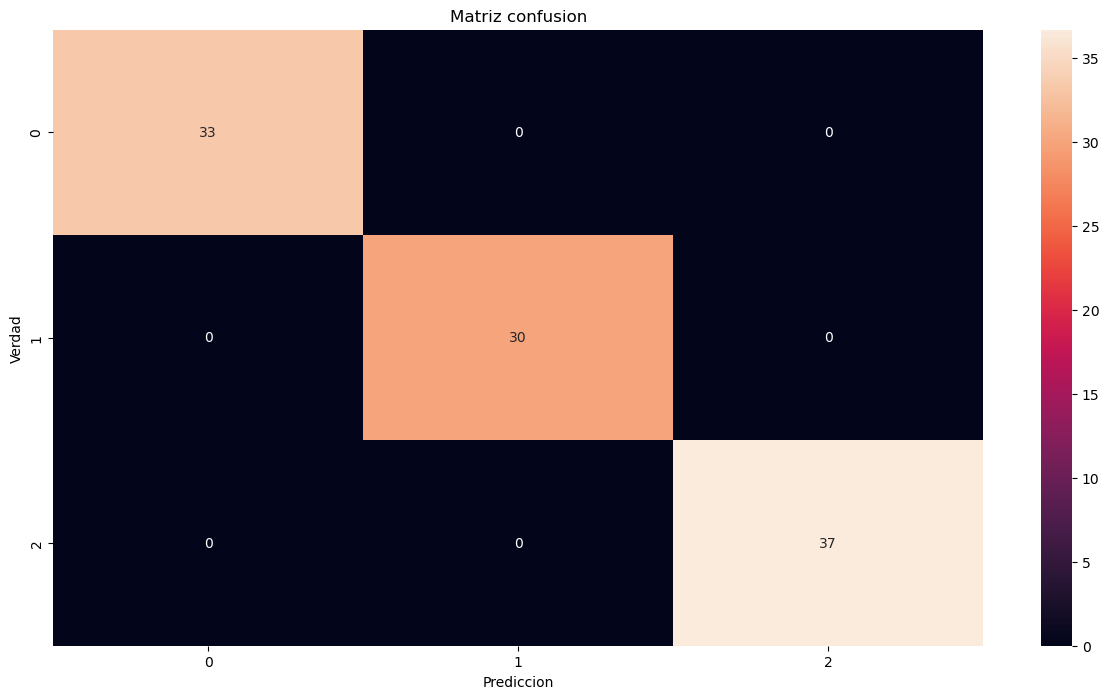

In [120]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_test)/cm(y_test, y_pred_test).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [121]:
#train
cm(y_train, y_pred_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]])

In [122]:
cm(y_train, y_pred_train)/cm(y_train, y_pred_train).sum()*100

array([[33.33333333,  0.        ,  0.        ],
       [ 0.        , 31.66666667,  2.5       ],
       [ 0.        ,  0.        , 32.5       ]])

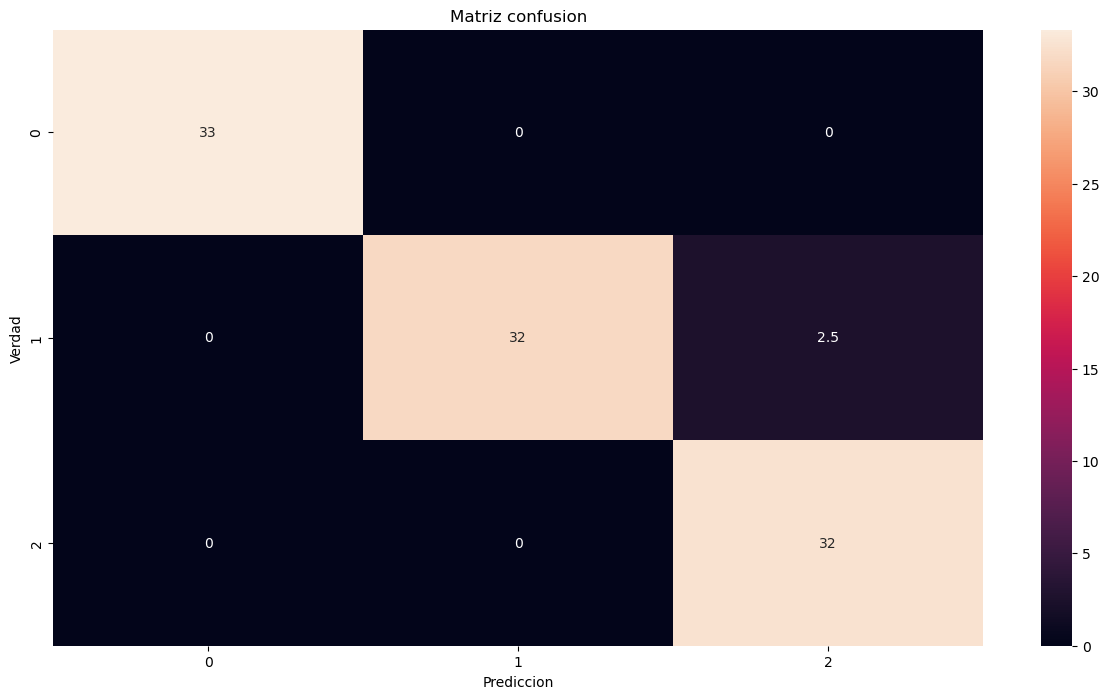

In [123]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_train)/cm(y_train, y_pred_train).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.